In [1]:
# import essential libraries

import numpy as np 
import tensorflow as tf 
from tensorflow import keras 

In [2]:
# load the data from keras

data = keras.datasets.imdb

In [3]:
# split the data for training and testing

(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
# check shape of the data

train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
## get the mapping of each word  

word_index = data.get_word_index()
word_index = {k : (v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
# Now let's reverse the keys and values because we had word as key and integer as value

reversed_word_index = dict([(v, k) for k,v in word_index.items()])

In [7]:
# create a decode function 

def decode_review(text):
    return " ".join([reversed_word_index.get(i, "?") for i in text])

print(decode_review(test_data[10]))

<START> inspired by hitchcock's strangers on a train concept of two men <UNK> murders in exchange for getting rid of the two people messing up their lives throw <UNK> from the train is an original and very inventive comedy take on the idea it's a credit to danny <UNK> that he both wrote and starred in this minor comedy gem br br anne <UNK> is the mother who <UNK> the film's title and it's understandable why she gets under the skin of danny <UNK> with her sharp tongue and relentlessly putting him down for any minor <UNK> billy crystal is the writer who's wife has stolen his book idea and is now being <UNK> as a great new author even appearing on the oprah show to in <UNK> he should be enjoying thus <UNK> gets the idea of <UNK> murders to rid themselves of these <UNK> factors br br of course everything and anything can happen when writer carl <UNK> lets his imagination <UNK> with <UNK> ideas for how the plot develops and it's amusing all the way through providing plenty of laughs and chu

In [8]:
# The reviews are not of the same length so make the length of all reviews equal

train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=256 ,value=word_index["<PAD>"], padding="post")
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=256 ,value=word_index["<PAD>"], padding="post")

print(len(train_data[0]), len(test_data[10]))

256 256


In [9]:
# Model structure

model = keras.Sequential()
model.add(keras.layers.Embedding(10000,32, input_length=256)) # embedding layer to create a vector of each word
model.add(keras.layers.GlobalAveragePooling1D()) # take the average of the vector
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# split the data for validation 

x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

# fit the model
model_fit = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=512, epochs=25, verbose=1)

Epoch 1/25
30/30 [==============================] - 1s 32ms/step - loss: 0.6924 - accuracy: 0.5221 - val_loss: 0.6910 - val_accuracy: 0.5559
Epoch 2/25
30/30 [==============================] - 1s 26ms/step - loss: 0.6878 - accuracy: 0.5816 - val_loss: 0.6813 - val_accuracy: 0.7070
Epoch 3/25
30/30 [==============================] - 1s 27ms/step - loss: 0.6668 - accuracy: 0.6729 - val_loss: 0.6414 - val_accuracy: 0.7480
Epoch 4/25
30/30 [==============================] - 1s 26ms/step - loss: 0.6061 - accuracy: 0.7437 - val_loss: 0.5443 - val_accuracy: 0.8280
Epoch 5/25
30/30 [==============================] - 1s 26ms/step - loss: 0.5027 - accuracy: 0.8094 - val_loss: 0.4298 - val_accuracy: 0.8518
Epoch 6/25
30/30 [==============================] - 1s 27ms/step - loss: 0.4173 - accuracy: 0.8429 - val_loss: 0.3606 - val_accuracy: 0.8669
Epoch 7/25
30/30 [==============================] - 1s 27ms/step - loss: 0.3560 - accuracy: 0.8710 - val_loss: 0.3221 - val_accuracy: 0.8757
Epoch 8/25
30

In [15]:
# model evaluation

(loss, accuracy) = model.evaluate(test_data, test_labels)
print("Loss :-", loss)
print("Accuacy :-",accuracy)

782/782 [==============================] - 1s 1ms/step - loss: 0.4929 - accuracy: 0.8629
Loss :- 0.49293139576911926
Accuacy :- 0.8628799915313721


In [16]:
# store the prediction in a variable and conversion in appropriate form

y_pred = model.predict(test_data)
y_pred = [1 if x>0.5 else 0 for x in y_pred]
y_pred[:10]

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1]

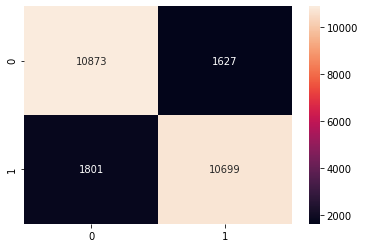

In [17]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt="d");

In [21]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [22]:
# prediction

index = 435
print("Review")
print(decode_review(test_data[index]))

def prediction(actual,pred,index):
  if actual[index]==1:
      print("Actual :- Positive")
  else:
      print("Actual :- Negative")
      
  if pred[index]==1:
      print("Predicted :- Positive")
  else:
      print("Predicted :- Negative")

prediction(test_labels, y_pred, index)

Review
<START> spoilers <UNK> br br where do i begin with just how silly this movie was <UNK> sized people living under the garden attacking residents of a big <UNK> when i first sat down to watch this movie i was unaware that the protagonists where not etc but 10 inch high <UNK> that looked mighty easy to kick hard and far i carried on watching it because i like to see movies through to the end even awful ones this movie was terrible my girlfriend who went to sleep inside the first ten minutes apart from finding it a good aid to sleep thought it was hilarious that i had bothered to watch it all br br tiny <UNK> even in large numbers the thought is silly i know are about as scary and menacing as flat <UNK> they only managed to trip one guy up and kill a cat before they were blown up the end i did mention it sucked right <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

# **---------------------------------Keep learning, Keep improving-------------------------------**